In [94]:
## Imports:
import os
import sys
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import ComputableInformationDensity
from ComputableInformationDensity.computable_information_density import *
from ComputableInformationDensity.cid import *

## Set plotting style and print options
plt.style.use('sg_article')

In [93]:
from multiprocessing import Pool, cpu_count

def lz77py(sequence):
    """ Lempel-Ziv 77 complexity \n
    Note: The input sequence is cast as string 
    and not tuple (for performance reasons).
    """
    seq = ''.join(map(str, sequence))
    complexity, ind, inc = 1, 1, 0
    while ind + inc < len(seq):
        if seq[ind : ind + inc + 1] in seq[: ind + inc]:
            inc += 1
        else:
            complexity += 1
            ind += inc + 1
            inc = 0
    return complexity + 1 if inc != 0 else complexity

def cid_shuffle_dev(sequence, nshuff):
    """ Computable Information Density \n
    Args: 
        sequence: one-dimensional data array.
        nshuff: number of shuffles of the sequence.
    Returns:
        CID measure of the randomly shuffled sequence.
    """
    # get new instance of NumPy's random number generator
    rng = np.random.default_rng()   # this can be seeded!
    
    # generator yielding shuffled copy of sequence:
    def shuffle():
        for _ in range(nshuff):
            rng.shuffle(sequence)
            # yield copy so not to share memory
            # among process-pool of workers:
            yield sequence.copy()
    
    # create and configure a pool of workers:
    with Pool(min(cpu_count(), nshuff)) as pool:
        cid_pool = pool.map_async(cid, shuffle())
        pool.close()    # close the process pool
        pool.join()     # wait for all workers to complete
        
    return np.mean(cid_pool.get())


In [105]:
seq.shape, seq.size

((16, 16, 4), 1024)

In [102]:
seq = np.round(np.random.uniform(0, .75, size=(16,16,4))).astype(int)
L = len(seq)
obj = CID(3, nbits=int(np.log2(L)), nshuff=2)
obj.__call__(data=seq,)

ValueError: cannot reshape array of size 1024 into shape (16,16,16)

In [81]:
seq = np.round(np.random.uniform(0, .75, size=(128))).astype(int)
(seq==0).sum()/len(seq)

0.6953125

In [91]:
seq = np.array([[np.ones(10), np.zeros(10), np.ones(10), np.zeros(10)]]).flatten().astype(int)
complexity_val = lz77py(seq)
cid_val = cid(seq)
cid_shuffle_val = cid_shuffle_dev(seq, nshuff=12)
cid_val, cid_shuffle_val, complexity_val,

8


(0.8643856189774723, 1.8416817249153956, 4)

In [89]:
seq

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0])

0.5 1.0
0.6 0.84375
0.7 0.703125
0.7999999999999999 0.59375
0.8999999999999999 0.5625
0.9999999999999999 0.4765625
1.0999999999999999 0.4453125


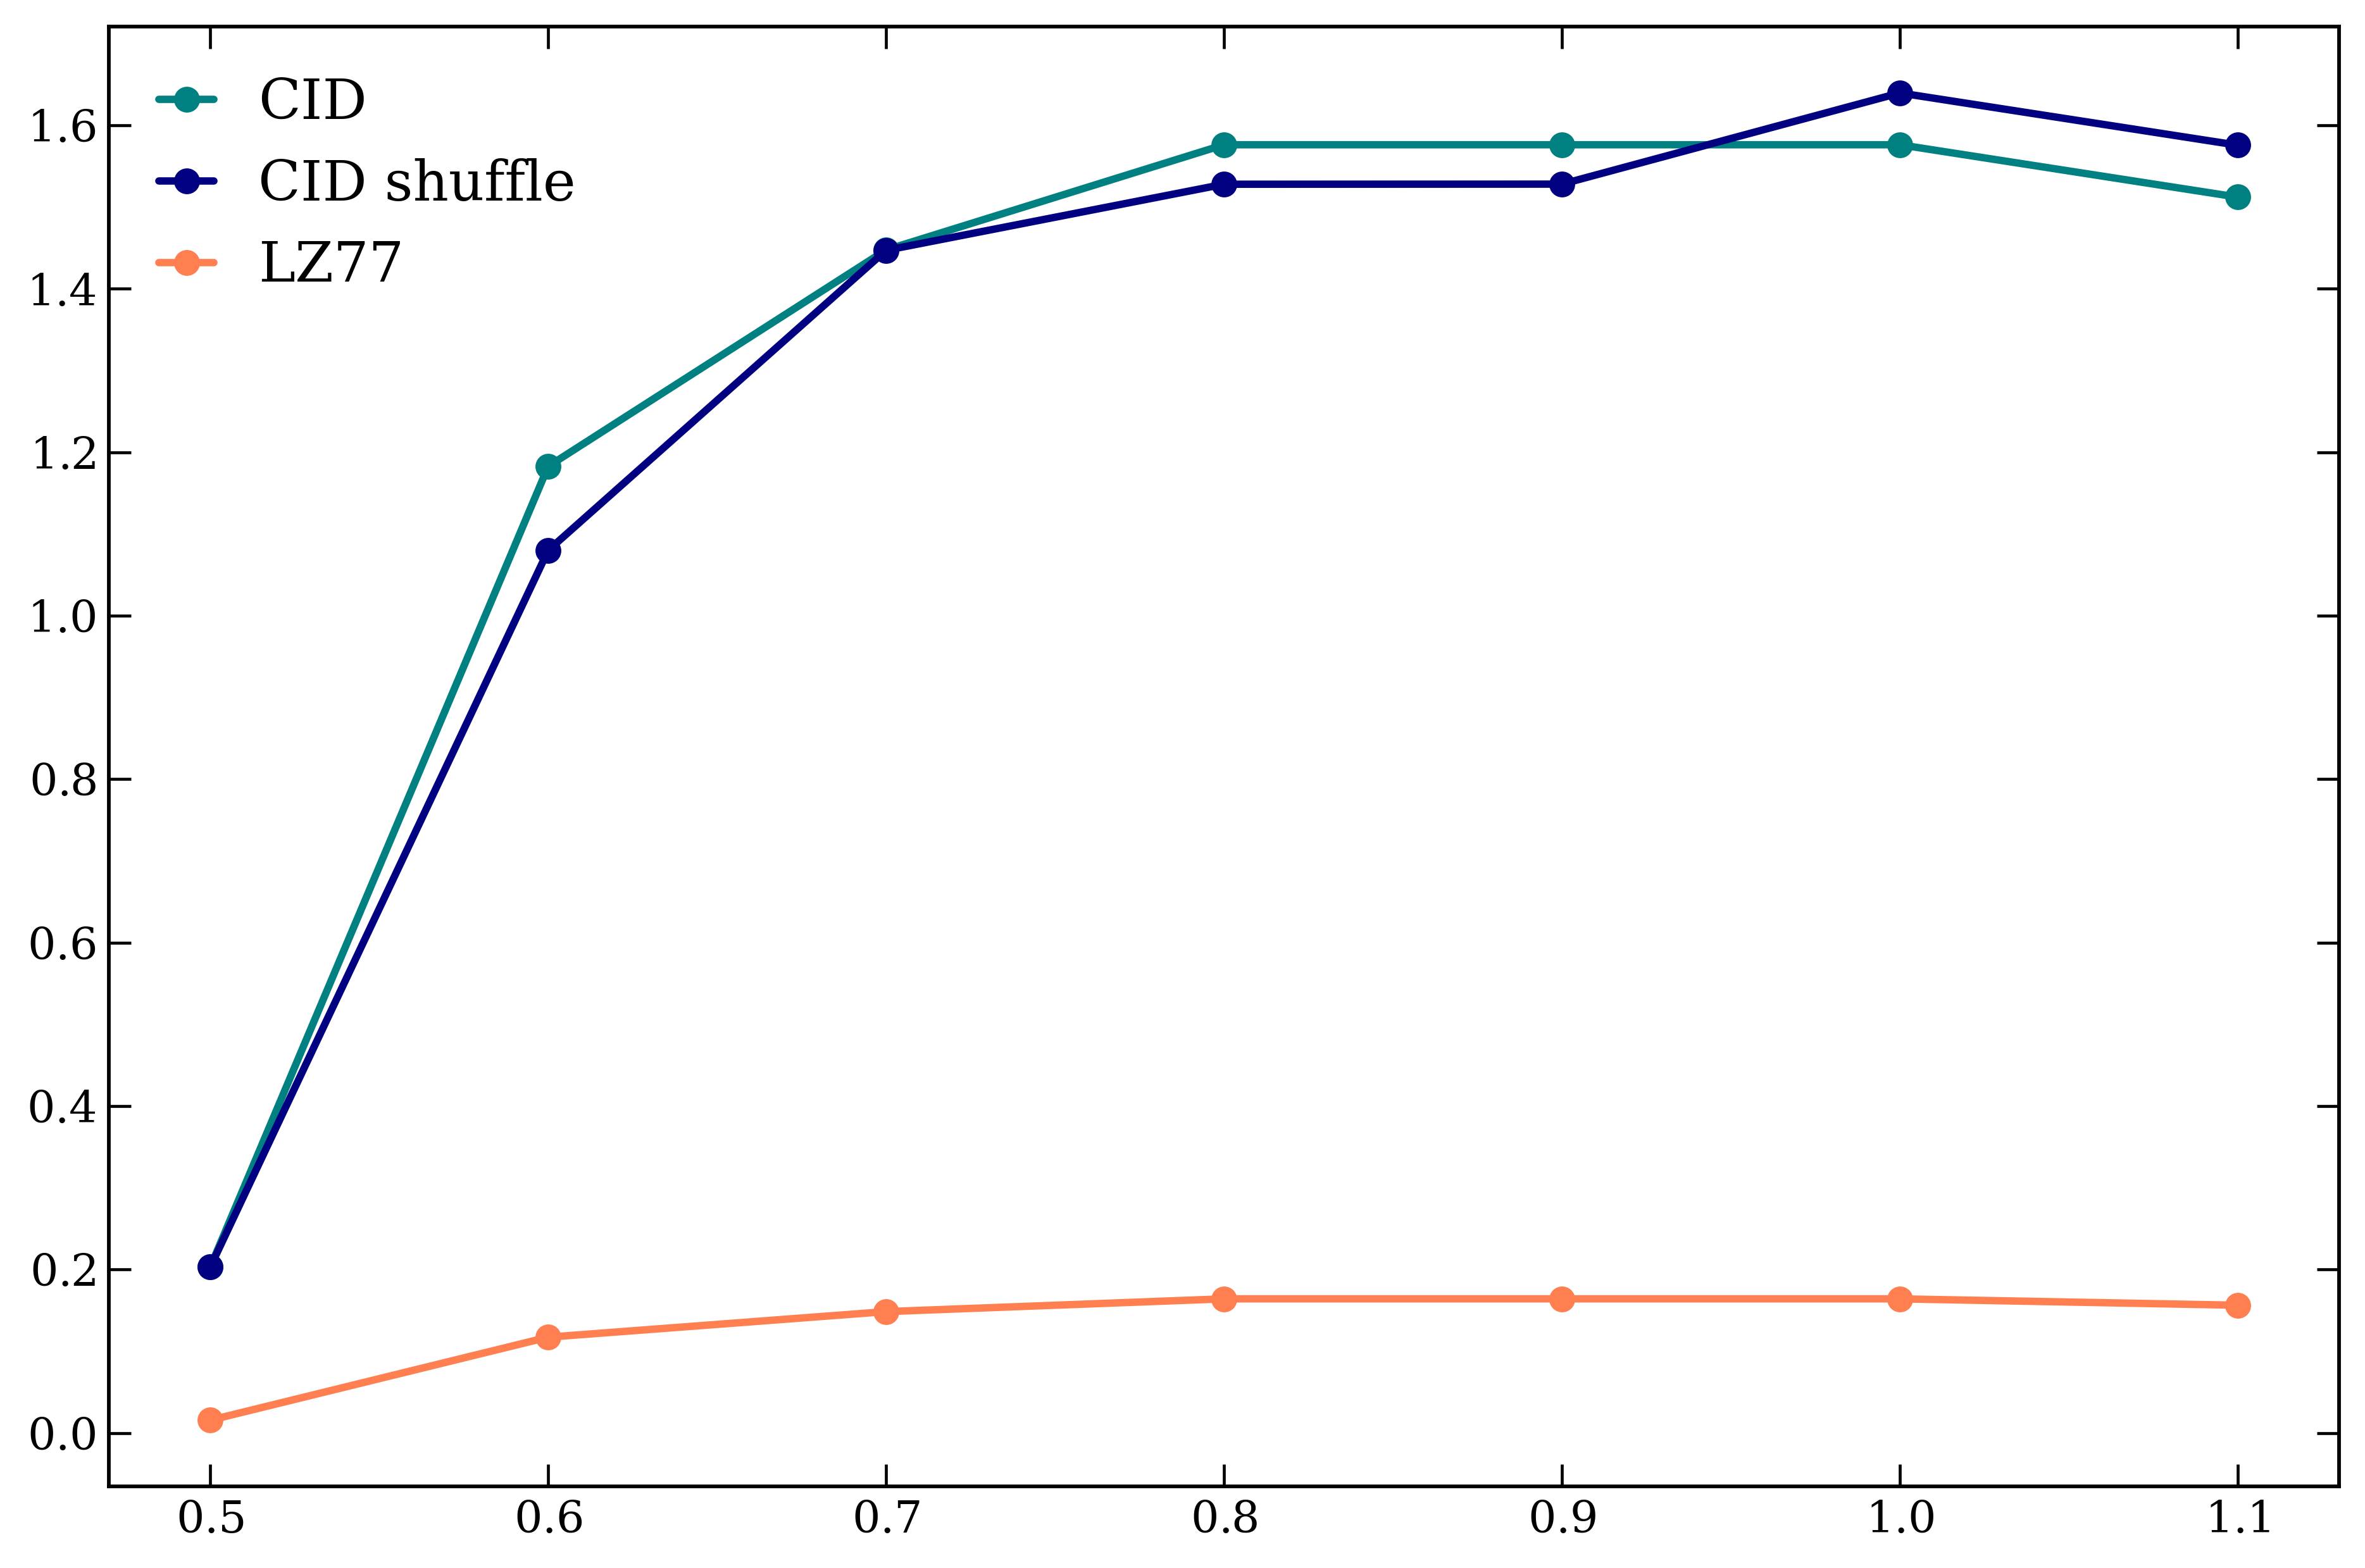

In [83]:
fracs = np.arange(0.5, 1.1, 0.1)
cid_vals = np.zeros(len(fracs), dtype=float)
cid_shuffle_vals = np.zeros(len(fracs), dtype=float)
complexity_vals = np.zeros(len(fracs), dtype=float)

for i, frac in enumerate(fracs):
    seq = np.round(np.random.uniform(0, frac, size=(128))).astype(int)
    complexity_vals[i] = lz77py(seq) / len(seq)
    cid_vals[i] = cid(seq)
    cid_shuffle_vals[i] = cid_shuffle_dev(seq, nshuff=4)
    print(frac, (seq==0).sum()/len(seq))
plt.plot(fracs, cid_vals, 'o-', label='CID')
plt.plot(fracs, cid_shuffle_vals, 'o-', label='CID shuffle')    
plt.plot(fracs, complexity_vals, 'o-', label='LZ77')
plt.legend()
# seq = np.random.randint(0, 2, size=(128))
# seq = np.round(np.random.uniform(0, .75, size=(128))).astype(int)
# comp = lz77py(seq)
# cid_val = cid(seq)
# cid_shuffle_val = cid_shuffle_dev(seq, nshuff=4)
# cid_val/cid_shuffle_val, cid_val    

In [43]:
seq = np.random.randint(0, 2, size=(128))
L = len(seq)
complexity_val = lz77py(seq)
cid_val = cid(seq)
cid_shuffle_val = cid_shuffle(seq, nshuff=4)
cid_val, cid_shuffle_val, complexity_val, np.log2(complexity_val), np.log2(L/complexity_val), complexity_val*(np.log2(complexity_val) + 2*np.log2(L/complexity_val))/L

(1.5121987351738497,
 1.576126192842821,
 20,
 4.321928094887363,
 2.678071905112638,
 1.5121987351738497)